## Airquality Dataset

### Outlier detector: **IsolationForest(n_estimators=20, random_state=10101)**

In [1]:
import os
import pickle
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt 
from utils import *
from STSC.stsc import *

### set outlier detector parameters 

In [2]:
set_x_generation_paramters(n_estimators=20, random_state=10101)

In [3]:
dataset_name = 'airquality'
data, outliers_index, inliers_index = read_dataset(dataset_name)
X, SQ, fp_record = generate_X_SQ(data, outliers_index) # fp_record會回傳數字對應到的feature pair 
G = generate_graph(X)
V = get_V(G)
if not os.path.isfile('./weights/outlier_weight_{}.npy'.format(dataset_name)):
    S = maximum_weight_matching(SQ, V)
    np.save("./weights/outlier_weight_{}".format(dataset_name), S)
else:
    S = np.load("./weights/outlier_weight_{}.npy".format(dataset_name))
n_cluster = 8
C = self_tuning_spectral_clustering_np(S, max_n_cluster=13)   
# with open('./weights/{}_cluster_{}.pickle'.format(n_cluster, dataset_name), 'wb') as f:
#     pickle.dump(C, f)
print('number of cluster: ', len(C))

Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.59it/s]


n_cluster: 2 	 cost: 867108.824632
n_cluster: 3 	 cost: 3349961.038733
n_cluster: 4 	 cost: 394347.641665
n_cluster: 5 	 cost: 27392.993668
n_cluster: 6 	 cost: 1858.060270
n_cluster: 7 	 cost: 1904.110232
n_cluster: 8 	 cost: 1992.065598
n_cluster: 9 	 cost: 2020.022178
n_cluster: 10 	 cost: 2004.697788
n_cluster: 11 	 cost: 2004.567124
n_cluster: 12 	 cost: 2102.458828
n_cluster: 13 	 cost: 2385.441010
number of cluster:  6


In [4]:
W_1 = cvx_solver(C, X, X.shape[1], 1)
W_3 = cvx_solver(C, X, X.shape[1], 3)
W_5 = cvx_solver(C, X, X.shape[1], 5)
W_10 = cvx_solver(C, X, X.shape[1], 10)


### 分別實驗 lambda=1、3、5、10

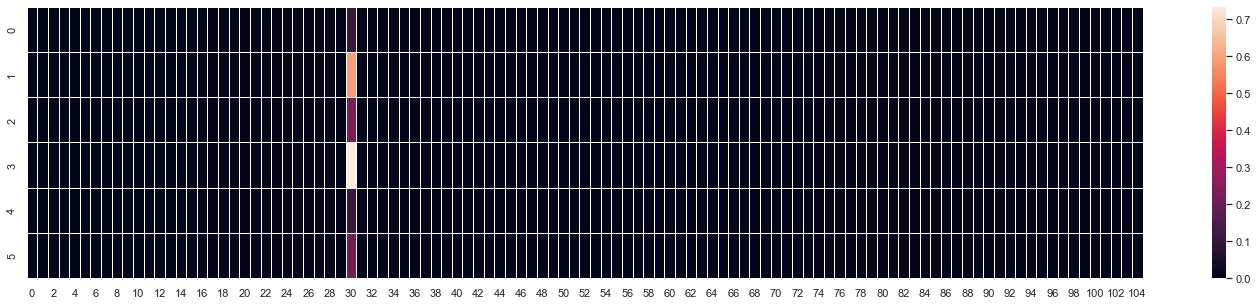

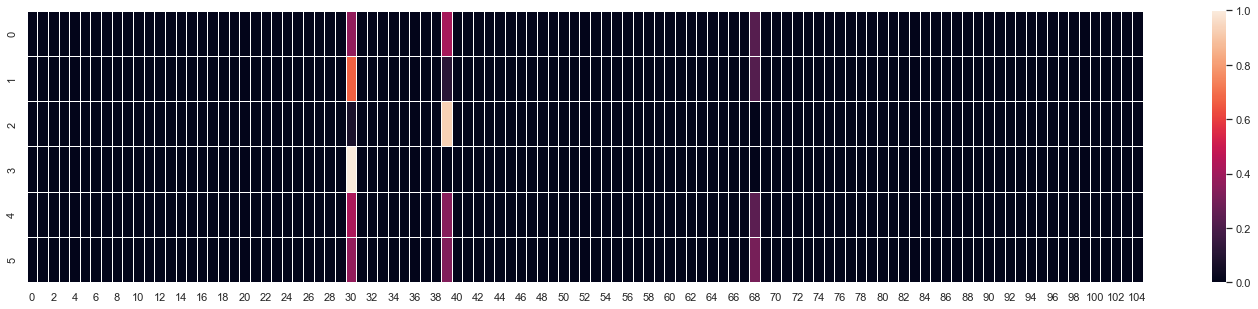

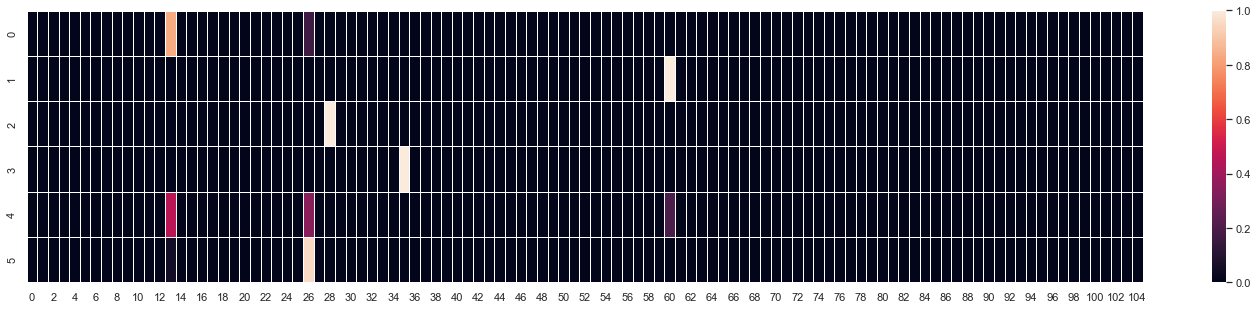

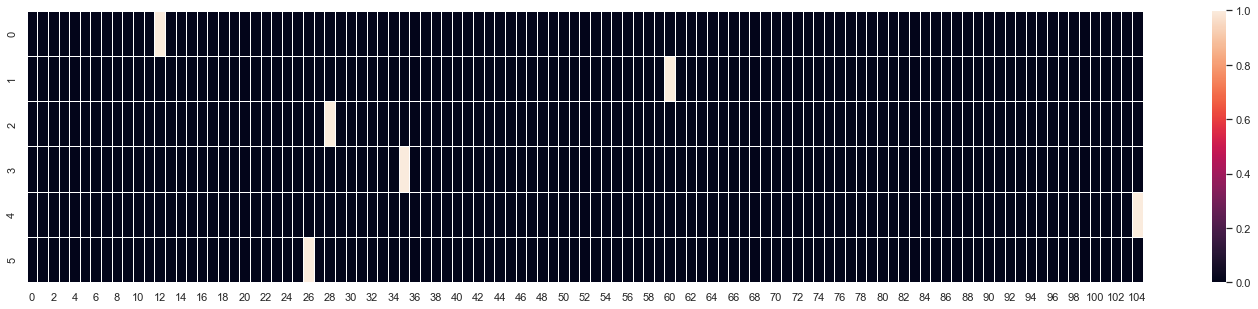

In [5]:
draw_heatmap(W_1.T) # lambda = 1  <====== global 
draw_heatmap(W_3.T) # lambda = 3 
draw_heatmap(W_5.T) # lambda = 5
draw_heatmap(W_10.T)   # lambda = 10  <===== local

### 為每個cluster找出最佳的feature pairs

In [6]:
cluster_fp_1 = get_clusters_fps(W_1.T, fp_record)
cluster_fp_3 = get_clusters_fps(W_3.T, fp_record)
cluster_fp_5 = get_clusters_fps(W_5.T, fp_record)
cluster_fp_10 = get_clusters_fps(W_10.T, fp_record)

In [7]:
df_list = [create_df(data[outliers_index], data[inliers_index], C[i]) for i in range(len(C))]

### Lambda = 1  Incrimination

In [8]:
get_incrimination(C, X, X.shape[1] , W_1.T, 3)

------------------
[0.6310140149675488, 0.6332290505900942, 0.6758170238009696]
[0.9969711384120412, 0.9996417169479381, 0.9999289241921504]
------------------
[0.7107021737417731, 0.7383136766307107, 0.7553696760160922]
[0.7395740516319426, 0.825835847578314, 0.83668646778822]
------------------
[0.43707478718225123, 0.5066008693154478, 0.5351971730154552]
[0.8101217804162035, 0.8949574315439359, 0.9211658065310909]
------------------
[0.7996934112648644, 0.8502883505686574, 0.8682349947012985]
[0.8056174697476237, 0.8705382494972512, 0.8752217243372652]
------------------
[0.7179764004919705, 0.7251674271350652, 0.7671252619527985]
[0.9725999705369002, 0.980999138114623, 0.9872882614116639]
------------------
[0.7012238214180291, 0.7043366764566471, 0.7419532907417118]
[0.9925597361061185, 0.9939890887952855, 0.9984461644398684]


### Lambda = 10 Incrimination

In [9]:
get_incrimination(C, X, X.shape[1] , W_10.T, 3)

------------------
[0.9969711384120412, 0.9999289241921504, 0.9999289241921504]
[0.9969711384120412, 0.9996417169479381, 0.9999289241921504]
------------------
[0.7395740516319426, 0.7821324446866557, 0.8013885583013313]
[0.7395740516319426, 0.825835847578314, 0.83668646778822]
------------------
[0.8101217804162035, 0.8887461892246478, 0.9141900295455648]
[0.8101217804162035, 0.8949574315439359, 0.9211658065310909]
------------------
[0.8056174697476237, 0.8502883505686574, 0.8828367543418252]
[0.8056174697476237, 0.8705382494972512, 0.8752217243372652]
------------------
[0.9725999705369002, 0.9786022116761692, 0.9791312266751793]
[0.9725999705369002, 0.980999138114623, 0.9872882614116639]
------------------
[0.9925597361061185, 0.9939890887952855, 0.9944356855370359]
[0.9925597361061185, 0.9939890887952855, 0.9984461644398684]


### Lambda = 1 

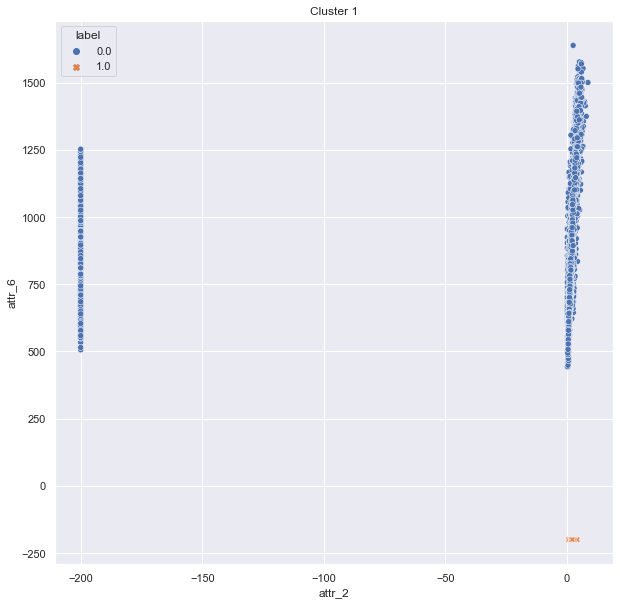

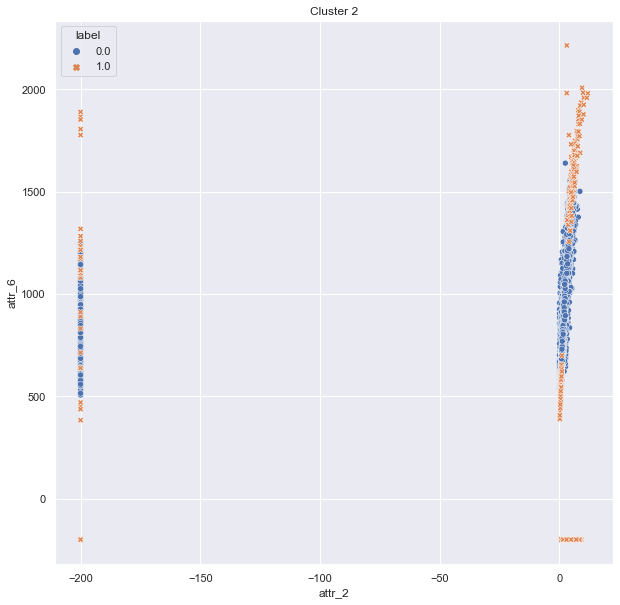

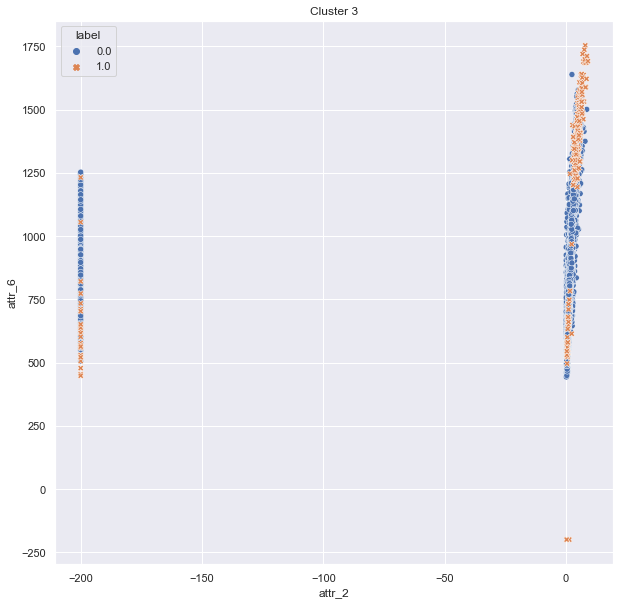

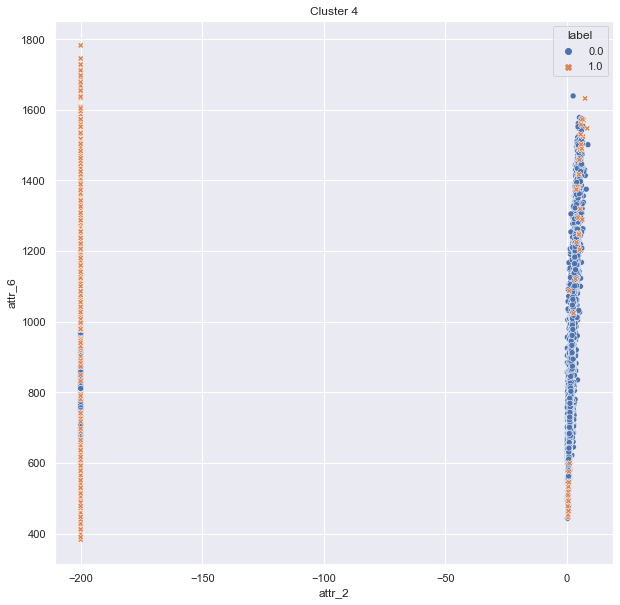

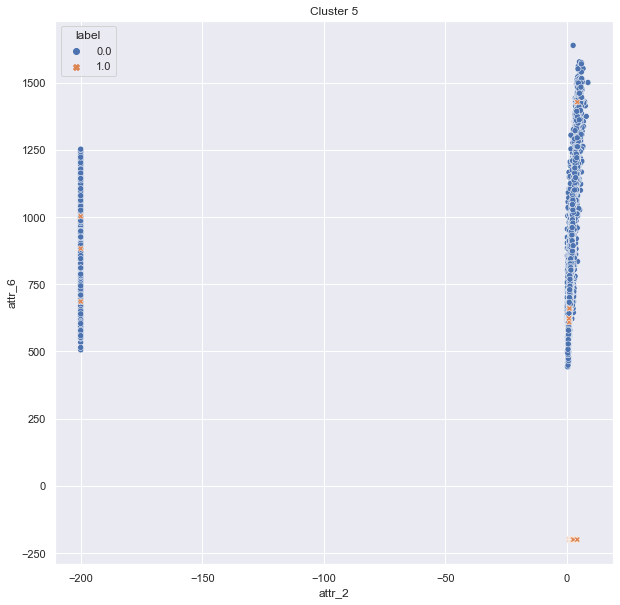

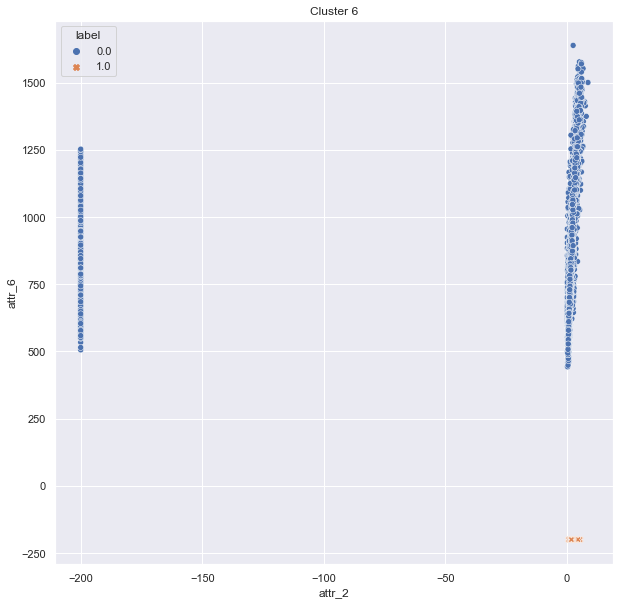

In [10]:
draw_scatter(df_list, cluster_fp_1)

### Lambda = 3 

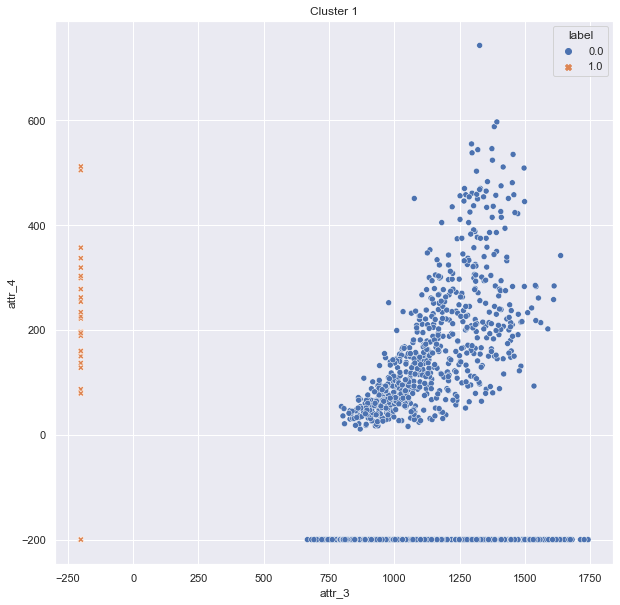

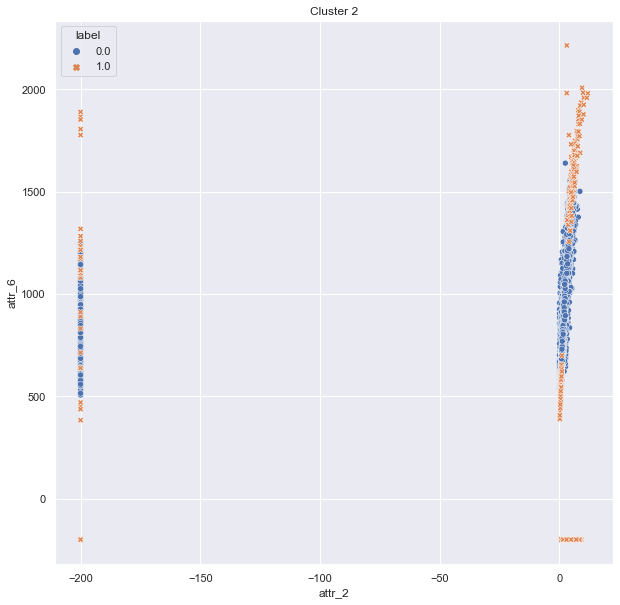

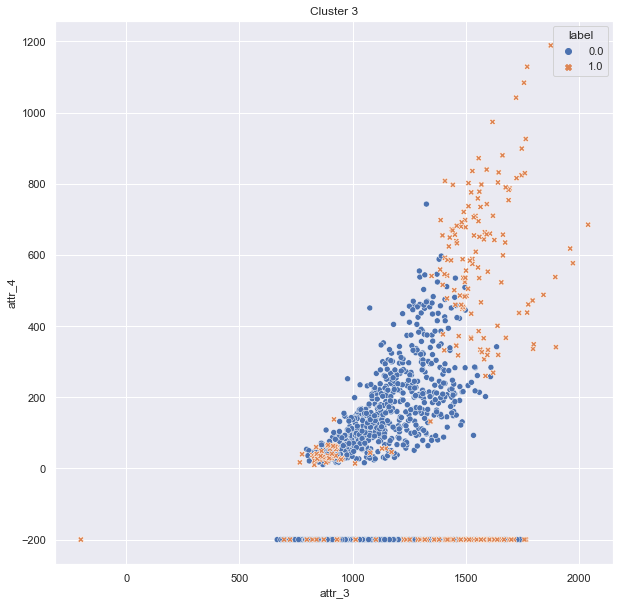

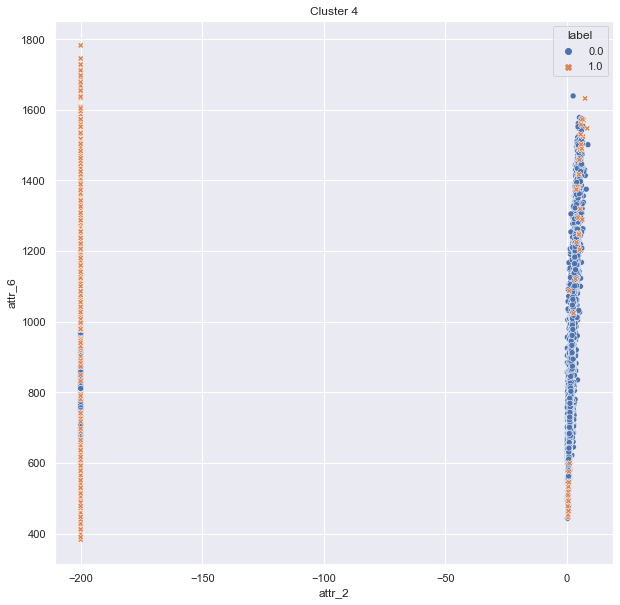

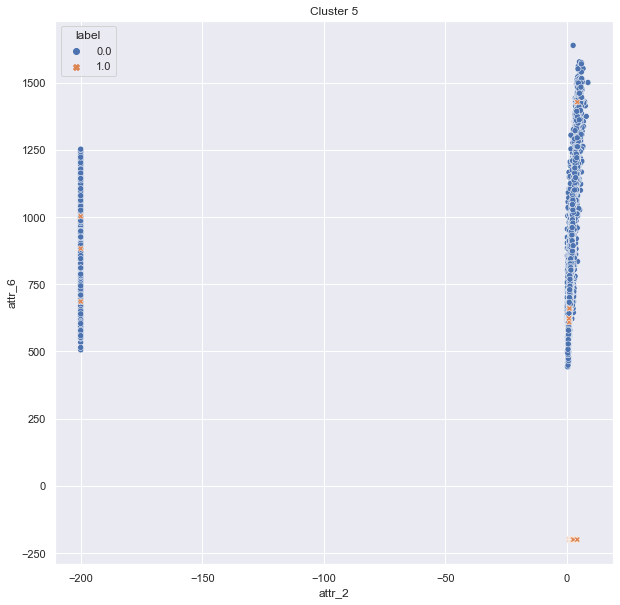

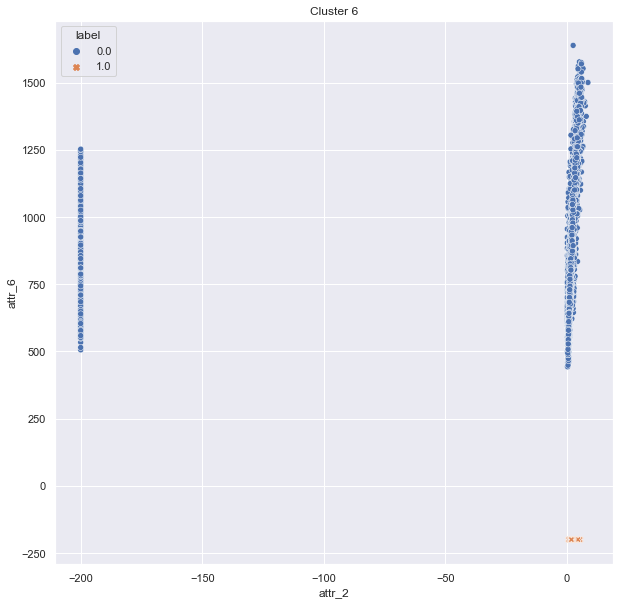

In [11]:
draw_scatter(df_list, cluster_fp_3)

### Lambda = 5

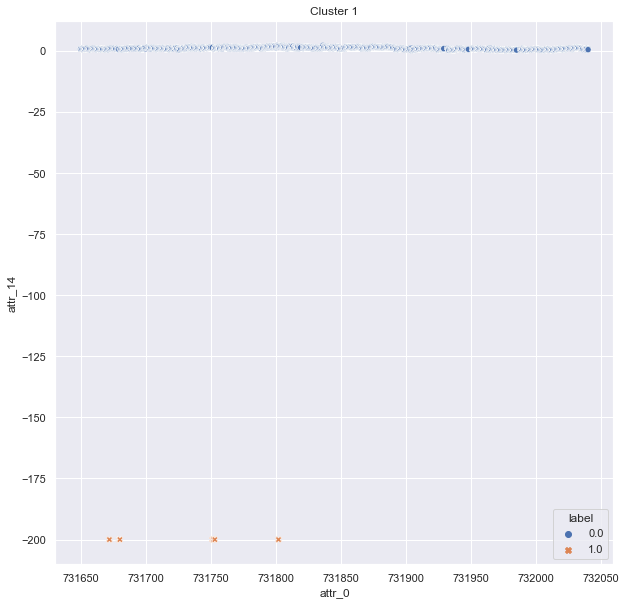

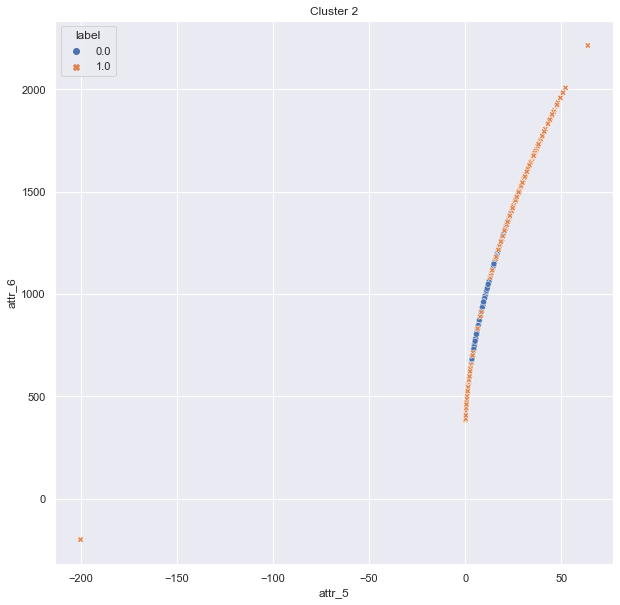

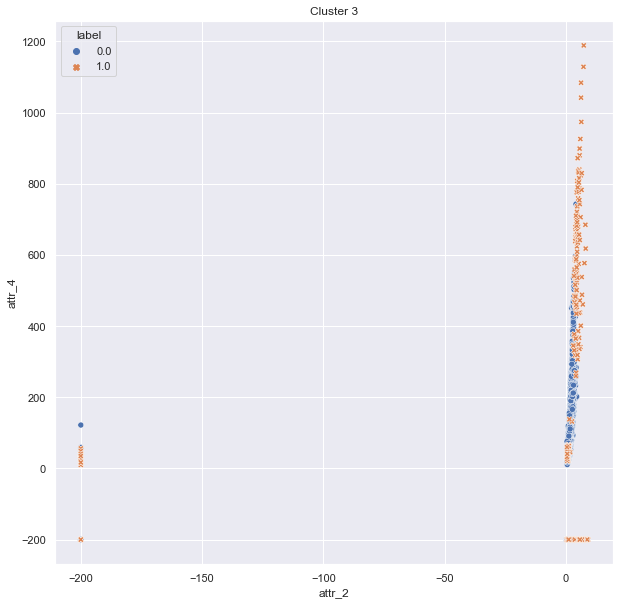

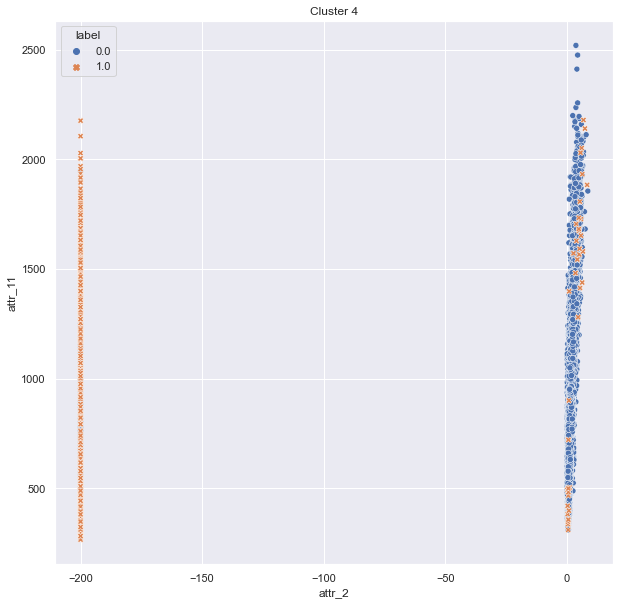

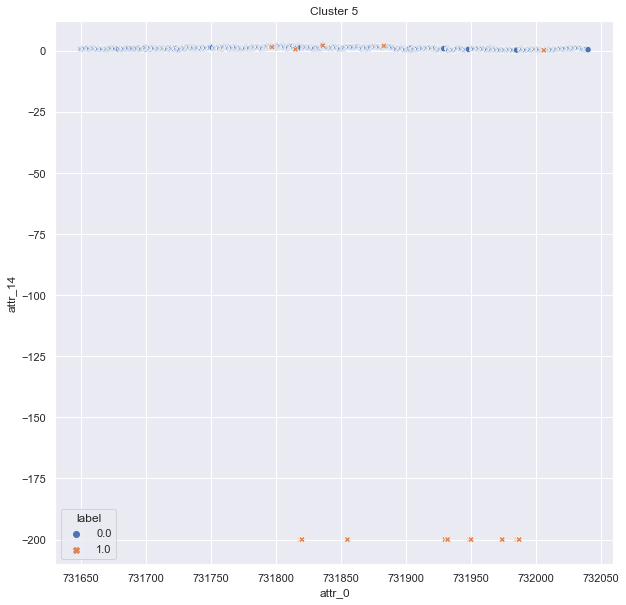

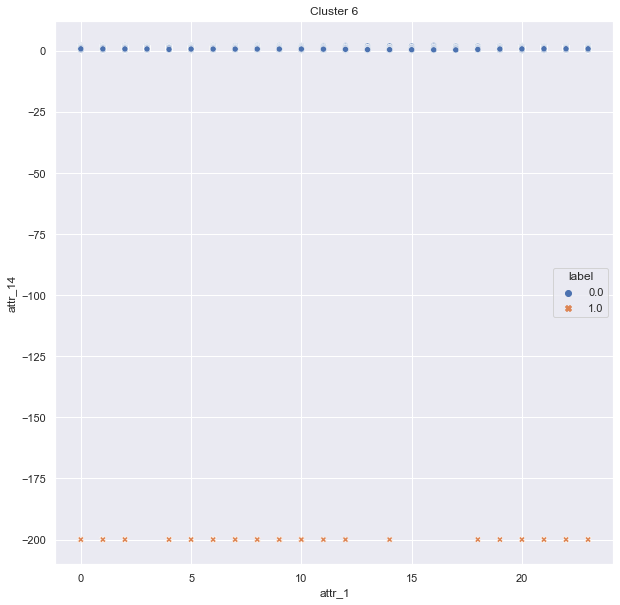

In [12]:
draw_scatter(df_list, cluster_fp_5)

### Lambda = 10

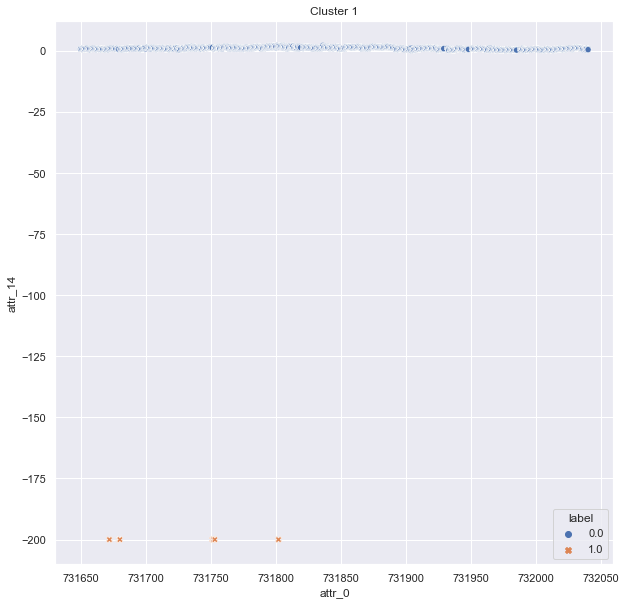

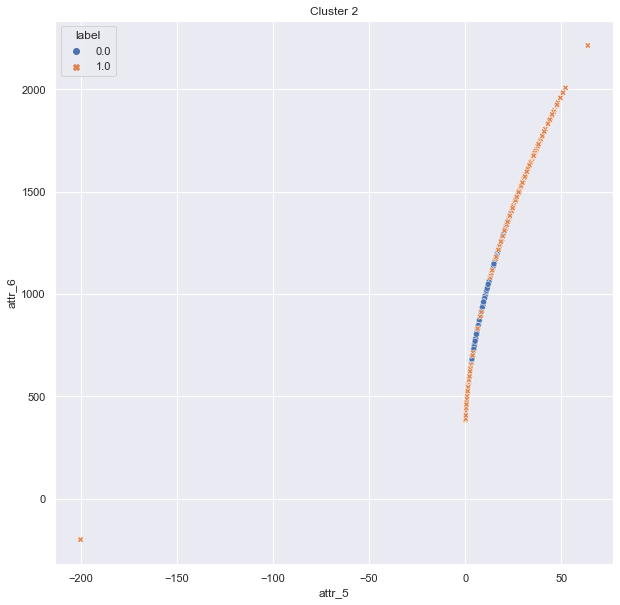

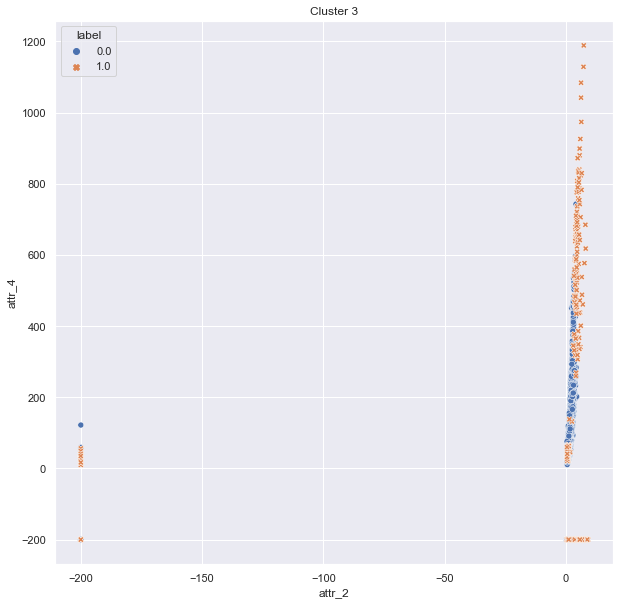

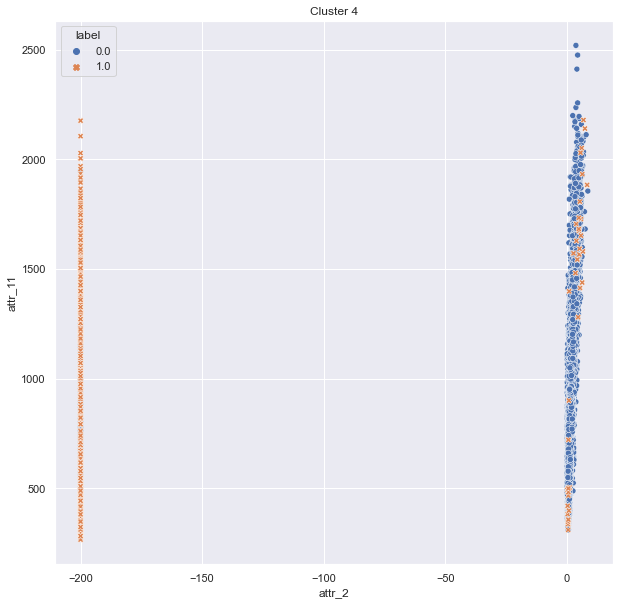

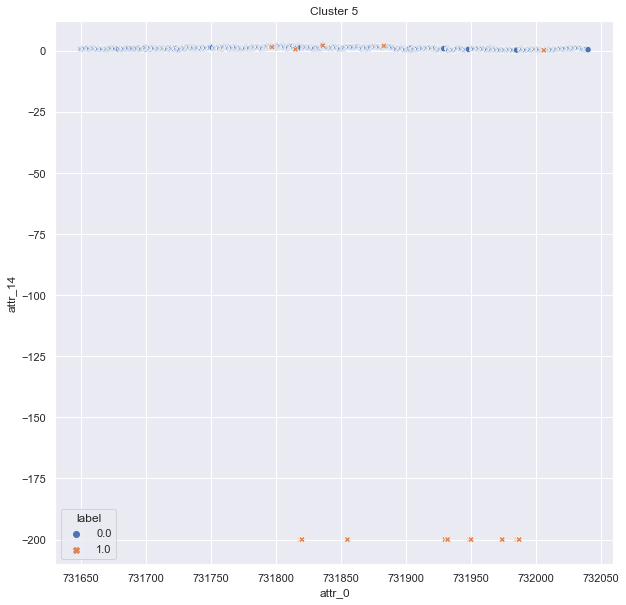

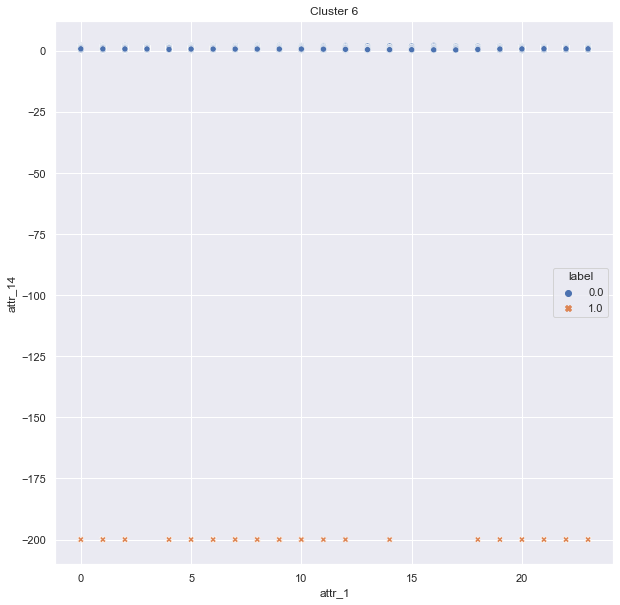

In [13]:
draw_scatter(df_list, cluster_fp_5)